# Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## data preprossesing

In [ ]:
import tensorflow as tf

# Define the path to your dataset directory
train = r'C:\Users\asus\OneDrive\Desktop\plant disease detection copy\train'

# Load the dataset
training_set= tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",                 #it means that the label contains sub-directories
    label_mode="categorical",        #(for multiple classes) and  int - for labels are enclosed as integers
    class_names=None,
    color_mode="rgb",
    batch_size=32,                #Batch size is the number of samples that you feed into your model at each iteration of the training process
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=0.1,
    subset="training",
    # interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    seed=123

)


Found 70295 files belonging to 38 classes.


In [ ]:
import tensorflow as tf

# Define the path to your dataset directory
train = r'C:\Users\asus\OneDrive\Desktop\plant disease detection copy\valid'

# Load the dataset
validation_set= tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=0.1,
    subset="validation",
    # interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    seed=123

)


Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[150.25 151.25 169.25]
   [154.75 155.75 173.75]
   [155.75 156.75 174.75]
   ...
   [119.25 120.25 141.25]
   [118.   119.   140.  ]
   [117.   118.   139.  ]]

  [[151.5  152.5  170.5 ]
   [152.   153.   171.  ]
   [154.25 155.25 173.25]
   ...
   [121.   122.   143.  ]
   [119.   120.   141.  ]
   [117.25 118.25 139.25]]

  [[153.   154.   172.  ]
   [151.5  152.5  170.5 ]
   [152.75 153.75 171.75]
   ...
   [122.75 123.75 144.75]
   [119.75 120.75 141.75]
   [118.   119.   140.  ]]

  ...

  [[ 41.5   67.5   20.5 ]
   [ 49.    75.    30.  ]
   [ 50.75  76.75  31.75]
   ...
   [ 63.5   93.75  53.  ]
   [ 64.25  92.25  53.25]
   [ 87.75 115.75  76.75]]

  [[ 45.25  71.25  24.25]
   [ 42.5   68.5   21.5 ]
   [ 46.75  72.75  27.75]
   ...
   [ 65.5   92.    55.75]
   [ 79.5  105.    70.25]
   [ 83.25 108.25  73.75]]

  [[ 45.25  71.25  24.25]
   [ 41.    67.    20.  ]
   [ 40.25  66.25  19.25]
   ...
   [ 73.25  97.25  65.25]
   [ 82.75 104.5   73.25]
   [ 95.25 116.25  8

### To avoid Overshooting
1. choose small learning rate default is 0.001 and we are taking 0.0001 .
2. there may be a chance of underfitting, so increase the number of neurons .
3. add more convulation layer to extract more feature from images , there may be possibility that model unable to capture relevant feature or model is      confusing due to lack of feature so feed with more feature .

# Building Model

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D , Dropout ,MaxPool2D ,Flatten
from tensorflow.keras.models import Sequential


In [ ]:
model = Sequential()

# Building Convulation Layer

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu'))              #This RELU function allows the network to learn non-linear relationships between features in the image
model.add(MaxPool2D(pool_size=2, strides=2))           #strides are no of sliding window 

In [ ]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))   #kernal size are the size of the filter herer 3 means 3 by 3 matrix
model.add(Conv2D(filters=64, kernel_size=3,  activation='relu'))                 #padding same refres to getting the same size image as input therefore we removed it in second step to get the total para with less MB
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Dropout(0.25))                       #to avoid overfitting

In [ ]:
model.add(Flatten())                           #which returns a copy of the array in one dimensional rather than in 2-D

In [ ]:
model.add(Dense(units=1500,activation='relu'))

In [ ]:
model.add(Dropout(0.4))                    #to avoid overfitting

In [ ]:
#output layer
model.add(Dense(units=38,activation='softmax'))          #SoftMax converts the raw output scores or logits generated by the last layer of a neural network into a probability distribution.

# Compiling Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

# Model Training


# note --> i can reduce epoches to 2 (from 10)and validation_split=0.1 (from none) to reduce time and for faster checking

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=2)
# Epoch, in machine learning, refers to the one entire passing of training data through the algorithm.

Epoch 1/10


2197/2197 [==============================] - 4788s 2s/step - loss: 1.4402 - accuracy: 0.5781 - val_loss: 0.5747 - val_accuracy: 0.8211
Epoch 2/10
2197/2197 [==============================] - 4711s 2s/step - loss: 0.4800 - accuracy: 0.8480 - val_loss: 0.2904 - val_accuracy: 0.9062
Epoch 3/10
2197/2197 [==============================] - 4987s 2s/step - loss: 0.2799 - accuracy: 0.9104 - val_loss: 0.3063 - val_accuracy: 0.9042
Epoch 4/10
2197/2197 [==============================] - 5377s 2s/step - loss: 0.1972 - accuracy: 0.9345 - val_loss: 0.2168 - val_accuracy: 0.9327
Epoch 5/10
2197/2197 [==============================] - 4688s 2s/step - loss: 0.1445 - accuracy: 0.9521 - val_loss: 0.2193 - val_accuracy: 0.9314
Epoch 6/10
2197/2197 [==============================] - 4611s 2s/step - loss: 0.1097 - accuracy: 0.9641 - val_loss: 0.1728 - val_accuracy: 0.9461
Epoch 7/10
2197/2197 [==============================] - 4976s 2s/step - loss: 0.0882 - accuracy: 0.9702 - val_loss: 0.1364

# Model Evaluation

In [ ]:
# model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 1219s 555ms/step - loss: 0.0228 - accuracy: 0.9929


In [ ]:
print(train_loss,train_acc)

0.022839661687612534 0.9928728938102722


In [ ]:
# model on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 271s 492ms/step - loss: 0.1054 - accuracy: 0.9674


In [ ]:
print(val_loss,val_acc)

0.10543324798345566 0.9674482345581055


# Saving model

In [ ]:
model.save("trained_model.h5")

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

{'loss': [1.4402058124542236,
  0.4799821376800537,
  0.27991387248039246,
  0.19721393287181854,
  0.14451970160007477,
  0.10972456634044647,
  0.08822936564683914,
  0.07836289703845978,
  0.06334690749645233,
  0.05749917030334473],
 'accuracy': [0.5781350135803223,
  0.8480119705200195,
  0.9103919267654419,
  0.9345188140869141,
  0.9521445631980896,
  0.9641226530075073,
  0.9702112674713135,
  0.9746781587600708,
  0.9790738821029663,
  0.981307327747345],
 'val_loss': [0.5747117400169373,
  0.29043740034103394,
  0.3063260018825531,
  0.21675942838191986,
  0.219277024269104,
  0.17275318503379822,
  0.13636063039302826,
  0.13145224750041962,
  0.2338171899318695,
  0.10543328523635864],
 'val_accuracy': [0.8211358785629272,
  0.9062144160270691,
  0.9041657447814941,
  0.9327338933944702,
  0.9314249753952026,
  0.9461074471473694,
  0.9610175490379333,
  0.9594240784645081,
  0.9350671768188477,
  0.9674482345581055]}

In [ ]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['accuracy']

[0.5781350135803223,
 0.8480119705200195,
 0.9103919267654419,
 0.9345188140869141,
 0.9521445631980896,
 0.9641226530075073,
 0.9702112674713135,
 0.9746781587600708,
 0.9790738821029663,
 0.981307327747345]

# Accuracy Visualisation

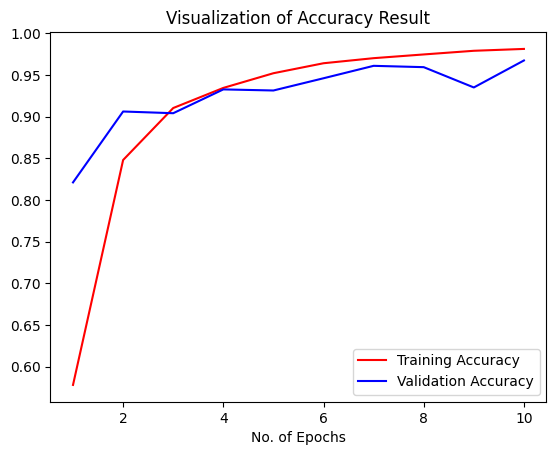

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()
plt.show()

# Some other metric for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,   #(modified) shuflle = false -> means class name should pass sequentially
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape       #here it is giving 38 classes probabilities for each image

17572/17572 [==============================] - 648s 37ms/step


(array([[9.99253690e-01, 2.33693736e-05, 1.32863223e-08, ...,
         1.06137620e-10, 4.68473593e-10, 1.55582818e-08],
        [9.99892831e-01, 9.73750357e-05, 1.13348776e-07, ...,
         5.78455617e-11, 1.70386749e-09, 1.18736965e-09],
        [9.99950647e-01, 4.54957444e-06, 2.02621697e-09, ...,
         1.00909746e-15, 2.29992414e-12, 5.02732833e-09],
        ...,
        [2.37869376e-13, 3.16859858e-16, 4.79719528e-11, ...,
         9.40672711e-14, 4.45340142e-14, 1.00000000e+00],
        [1.32216585e-13, 2.62193464e-16, 2.41041510e-11, ...,
         1.86685506e-13, 2.00262441e-14, 1.00000000e+00],
        [4.34095322e-15, 5.74981688e-16, 6.74490439e-14, ...,
         8.59220693e-16, 7.98505667e-15, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)      #axis =1 (means return index in coloumn wise )

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)

In [ ]:
true_categories 

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.99       440
                                   Apple___healthy       0.98      0.89      0.94       502
                               Blueberry___healthy       0.92      0.98      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.95      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.86      0.91       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.98      0.

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[474,   4,   0, ...,   0,   0,   0],
       [  0, 488,   0, ...,   0,   0,   0],
       [  0,   0, 433, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 485,   1,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   1, ...,   0,   0, 474]], dtype=int64)

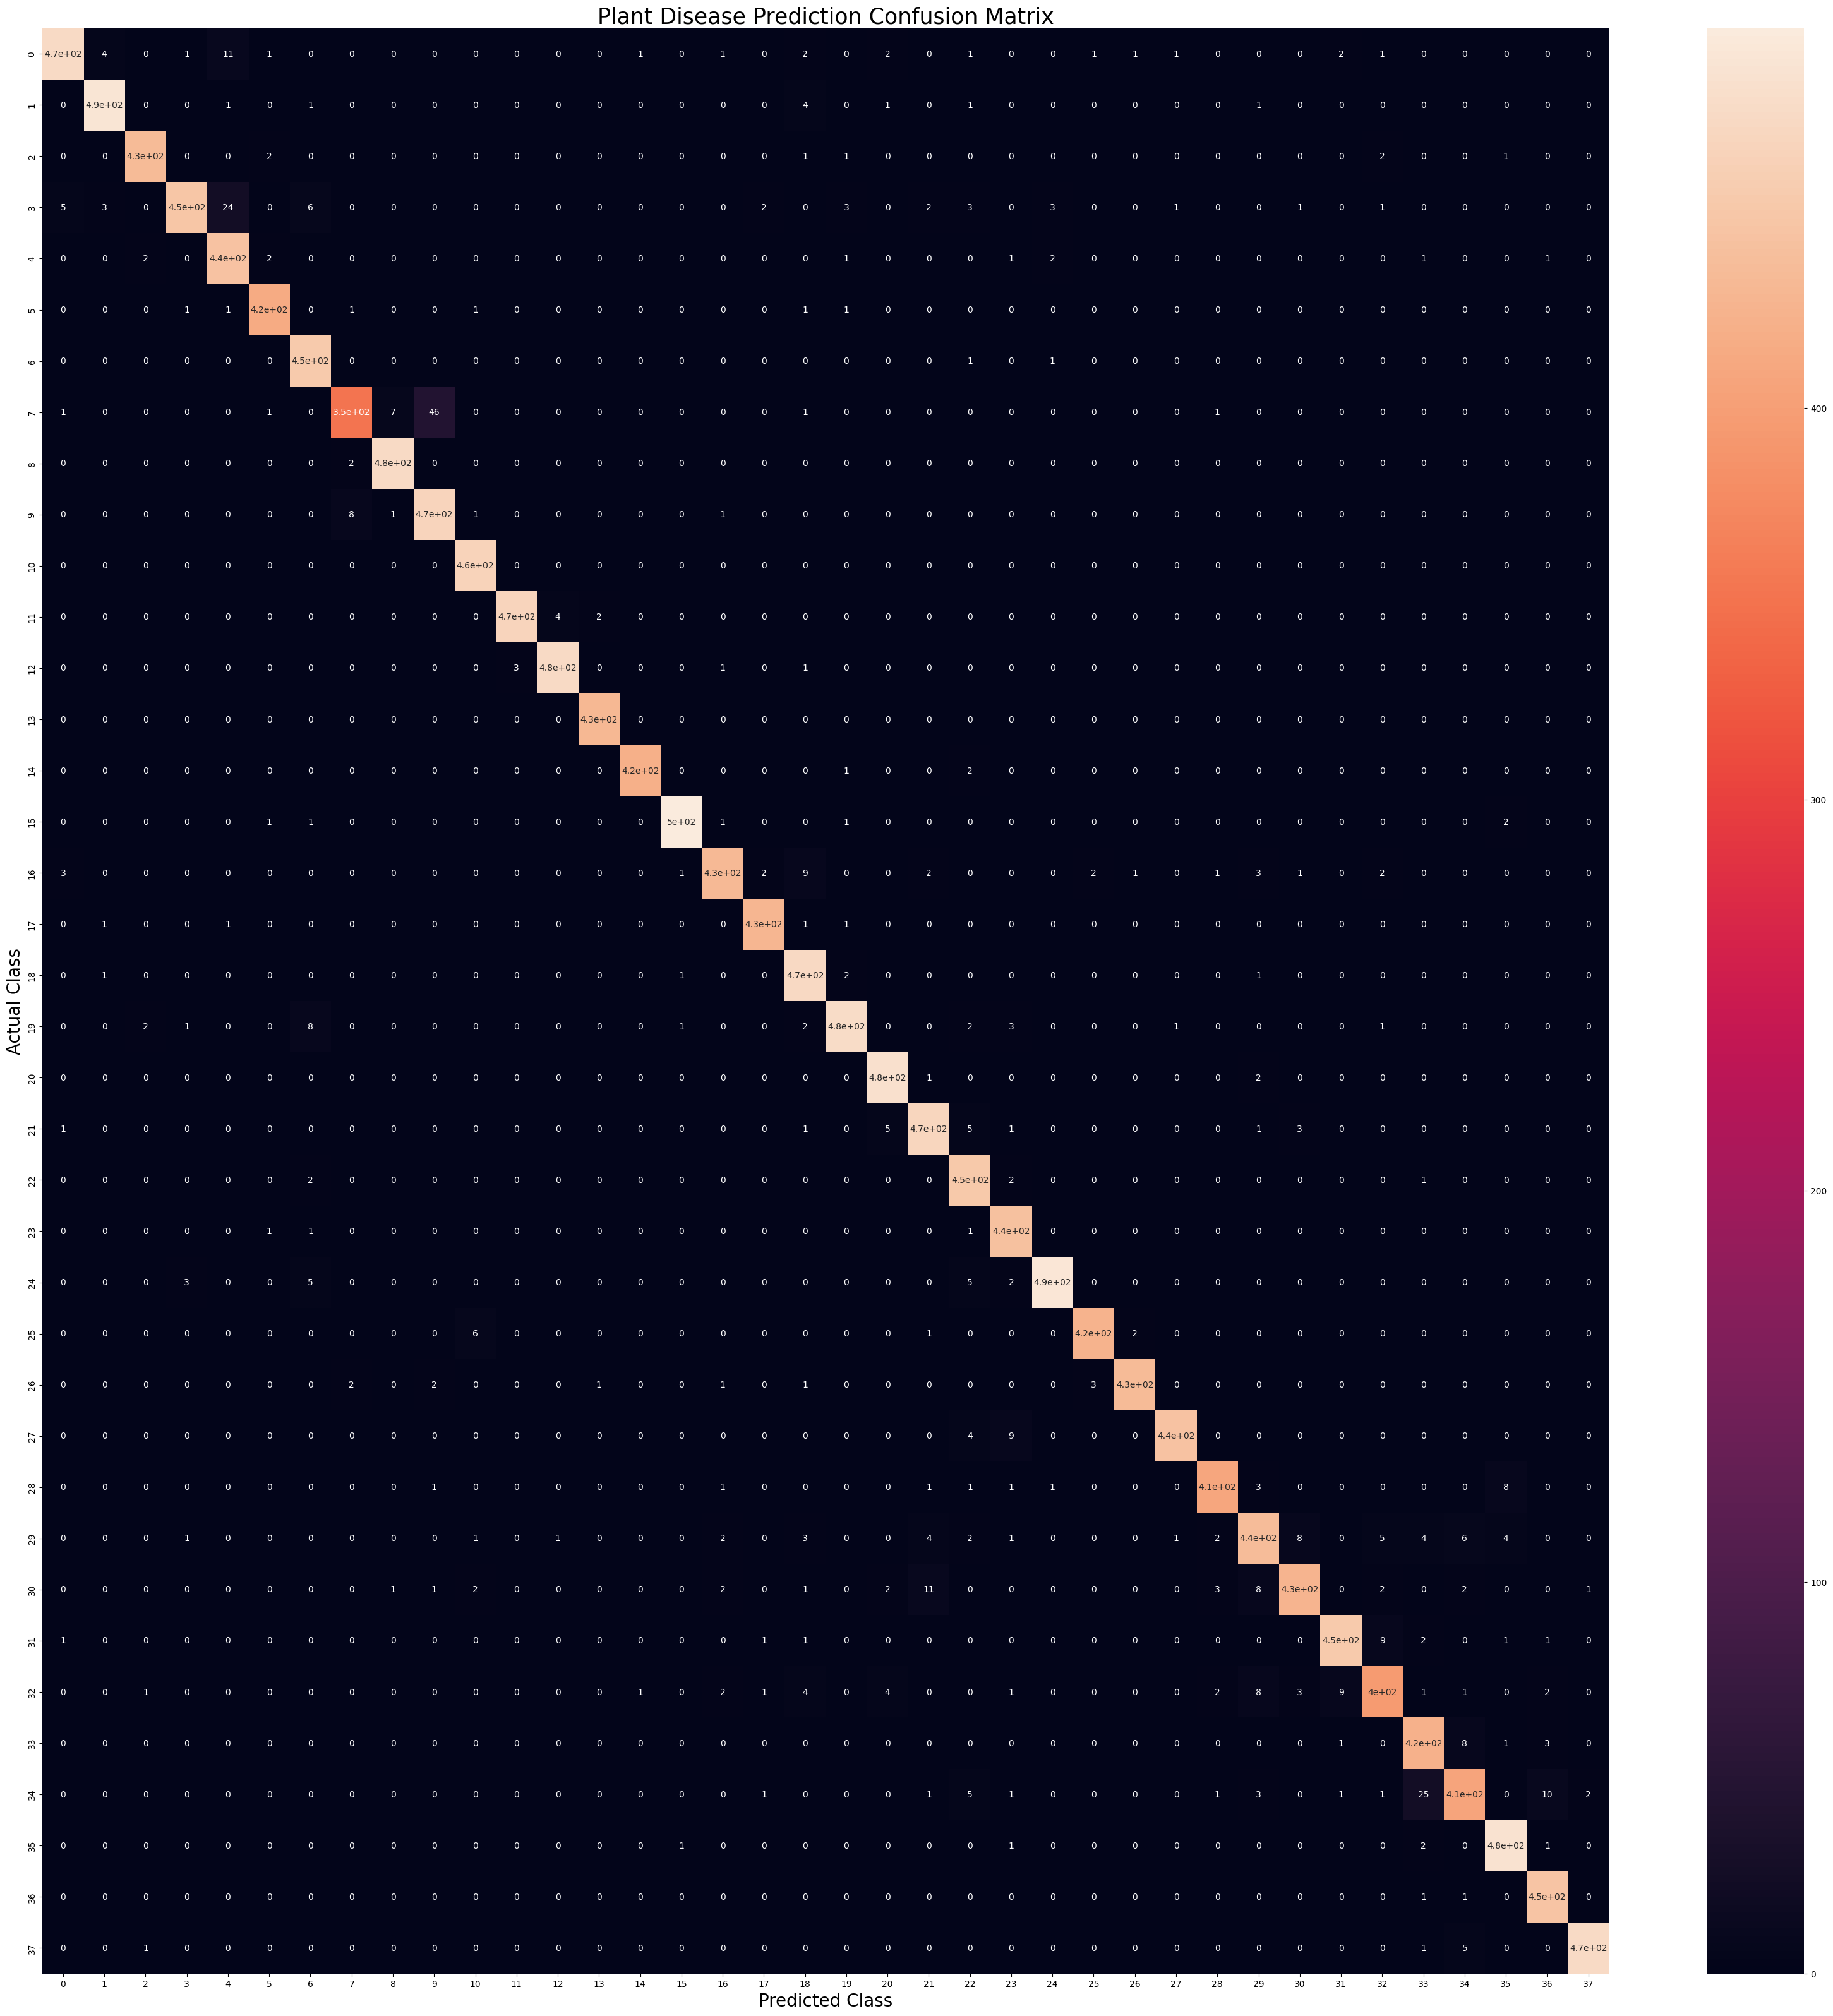

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})     #annot if true write the data values in each cell

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()